In [192]:

import numpy as np
import pandas as pd
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,SimpleRNN
import matplotlib.pyplot as plt


In [193]:
data=pd.read_csv('Stock Analysis/AABA_2006-01-01_to_2018-01-01.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [195]:
data.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,28.426479,28.766532,28.066558,28.412726,2.158391e+07
std,13.257242,13.356692,13.157326,13.258163,1.926231e+07
min,9.100000,9.480000,8.940000,8.950000,1.939061e+06
25%,16.175000,16.385000,15.970000,16.130000,1.248025e+07
50%,27.180000,27.490000,26.820000,27.100000,1.732130e+07
75%,36.655000,37.035000,36.305000,36.635000,2.512757e+07
max,73.020000,73.250000,72.460000,72.930000,4.382317e+08


In [196]:
data=data[['Open']]
data.head()

,Open
0,39.69
1,41.22
2,40.93
3,42.88
4,43.10


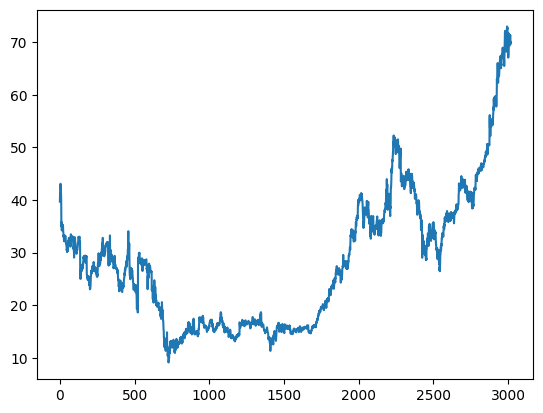

In [197]:
plt .plot(data[['Open']])

In [198]:
x=data['Open'].values
x

array([39.69, 41.22, 40.93, ..., 69.77, 70.12, 69.79], shape=(3019,))

In [199]:
x_test,x_train=x[:2500],x[:2500]

In [200]:
model=Sequential()
model.add(SimpleRNN(units=64,activation='tanh'))
model.add(Dense(1))

In [201]:
x[:10]

array([39.69, 41.22, 40.93, 42.88, 43.1 , 42.96, 42.19, 41.92, 41.  ,
       39.09])

In [202]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [203]:
x_trainn,y_trainn=[],[]
for i in range(len(x_train)-90):
    d=i+90
    x_trainn.append(x_train[i:d,])
    y_trainn.append(x_train[d])

In [204]:
x_testt,y_testt=[],[]
for i in range(len(x_test)-90):
    d=i+90
    x_testt.append(x_test[i:d,])
    y_testt.append(x_test[d])

In [205]:
import numpy as np
x_trainn=np.array(x_trainn)
x_testt=np.array(x_testt)

In [206]:
x_testt.shape

(2410, 90)

In [207]:
x[1]

np.float64(41.22)

In [208]:
yt[1]

np.float64(33.3)

In [209]:
x_trainn=np.reshape(x_trainn,(x_trainn.shape[0],x_trainn.shape[1],1))
x_testt=np.reshape(x_testt,(x_testt.shape[0],x_testt.shape[1],1))


In [210]:
x_trainn.shape

(2410, 90, 1)

In [211]:
x_trainn[1]

array([[41.22],
       [40.93],
       [42.88],
       [43.1 ],
       [42.96],
       [42.19],
       [41.92],
       [41.  ],
       [39.09],
       [35.01],
       [35.82],
       [34.44],
       [34.22],
       [34.55],
       [35.43],
       [34.94],
       [35.26],
       [35.06],
       [35.2 ],
       [34.45],
       [35.01],
       [34.  ],
       [33.9 ],
       [33.01],
       [33.24],
       [33.01],
       [32.58],
       [32.21],
       [32.14],
       [32.62],
       [33.3 ],
       [32.88],
       [32.9 ],
       [32.49],
       [33.01],
       [33.2 ],
       [33.11],
       [32.63],
       [32.21],
       [32.01],
       [31.7 ],
       [31.53],
       [31.42],
       [31.31],
       [31.05],
       [30.4 ],
       [30.72],
       [30.1 ],
       [31.25],
       [30.77],
       [30.34],
       [30.38],
       [30.42],
       [30.33],
       [31.52],
       [32.28],
       [31.84],
       [31.45],
       [32.44],
       [32.75],
       [32.45],
       [32.41],
       [

In [212]:
y_trainn=np.array(y_trainn)
y_testt=np.array(y_testt)

In [213]:
history=model.fit(x_trainn,y_trainn,epochs=100,batch_size=20)

Epoch 1/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 387.8503
Epoch 2/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 181.6814
Epoch 3/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 108.2896
Epoch 4/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 64.6779
Epoch 5/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 40.9964
Epoch 6/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 27.7216
Epoch 7/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 19.4985
Epoch 8/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 14.1327
Epoch 9/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 10.5280
Epoch 10/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.0621
Epoch 11/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.2957
Epoch 12/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.9735
Epoch 13/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.0279
Epoch 14/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.3004
Epoch 15/100
121/121 ━━━━━━━━━━

In [216]:
model.evaluate(x_trainn,y_testt)

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4818


0.4817677140235901

In [217]:
XTpredic=model.predict(x_trainn)
xtpredic=model.predict(x_testt)
xfinal=np.concatenate([XTpredic,xtpredic],axis=0)

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


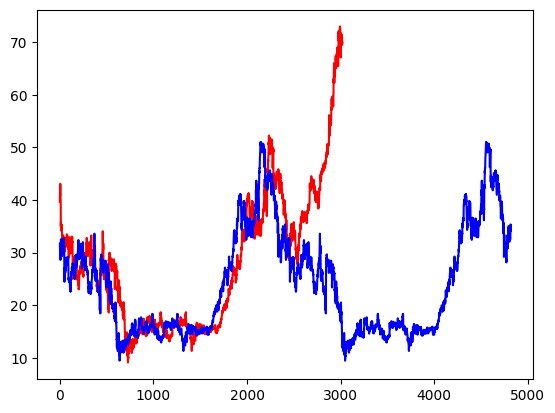

In [218]:
plt.plot(x,color='red')
plt.plot(xfinal,color='blue')